# Bike Sharing Project!
####    We predict bike sharing demand(Regression)
####    We use RMSLE 
####    RMSLE calculated log(1+y) RMSE 
####    Tip) We understand contest by Overview & discussion

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

data_path='/kaggle/input/bike-sharing-demand/'
train=pd.read_csv(data_path +'train.csv')
test=pd.read_csv(data_path +'test.csv')
submission=pd.read_csv(data_path +'sampleSubmission.csv')

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

test feature is less than train feature.. so we delete them

# **Data information**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


*  **datetime has year, month, day, hour.... many useful feature!**  
*  **Derived feature: year, month, day, hour, minute, second**
*   **if we know year, month, day -> we know weekday!** 

## **'datetime' feature analyze**

In [7]:
train['datetime'].head(10)

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
5    2011-01-01 05:00:00
6    2011-01-01 06:00:00
7    2011-01-01 07:00:00
8    2011-01-01 08:00:00
9    2011-01-01 09:00:00
Name: datetime, dtype: object

In [8]:
train['datetime']=pd.to_datetime(train['datetime'])
# date info 
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day

# time info
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

# week info
train['weekday']=train['datetime'].dt.weekday

In [9]:
# For data visualization, label -> string value
train['season'].replace([1, 2, 3, 4],
                        ['spring', 'summer', 'fall', 'winter'],
                        inplace=True)

train['weather'].replace([1, 2, 3, 4],
                         ['clear','few cloud', 'little rain/snow', 'heavy rain/snow'],
                         inplace=True)

In [10]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
10881,2012-12-19 19:00:00,winter,0,1,clear,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,winter,0,1,clear,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,winter,0,1,clear,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,winter,0,1,clear,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2
10885,2012-12-19 23:00:00,winter,0,1,clear,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2


# **EDA**

## 1. **target data analyze** 

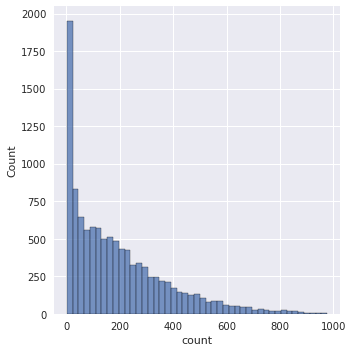

In [11]:
sns.displot(train['count']); # count 값의 분포도 출력 

**Data is biased so we use log conversion!**

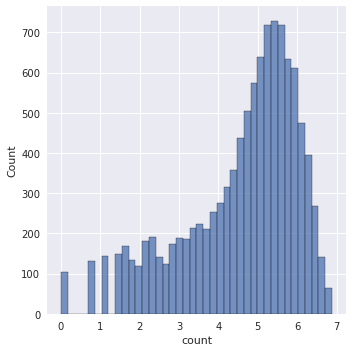

In [12]:
sns.displot(np.log(train['count'])); # log 함수 

**Good**

## 2. **categorical data analyze** 

### **year, month, day, hour, minute, second with barplot**

* barplot은 is basic bar graph

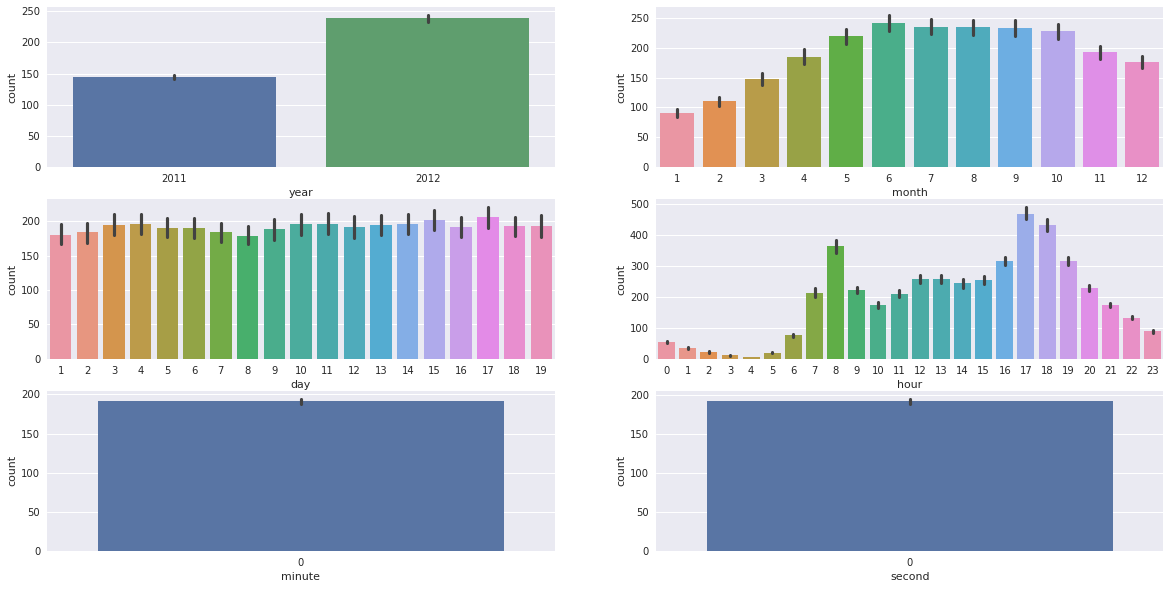

In [13]:
f, ax=plt.subplots(3, 2, figsize=(20,10))
sns.barplot(x='year', y='count', data=train, ax=ax[0,0])
sns.barplot(x='month', y='count', data=train, ax=ax[0,1])
sns.barplot(x='day', y='count', data=train, ax=ax[1,0])
sns.barplot(x='hour', y='count', data=train, ax=ax[1,1])
sns.barplot(x='minute', y='count', data=train, ax=ax[2,0])
sns.barplot(x='second', y='count', data=train, ax=ax[2,1])
plt.show();

* minute,second always 0 -> delete
* day has No useful because Train data day: 1-19 / Test data day:20-31

### **season, weather, holiday, workingday 분석 with boxplot**

* boxplot은 give more information than barplot

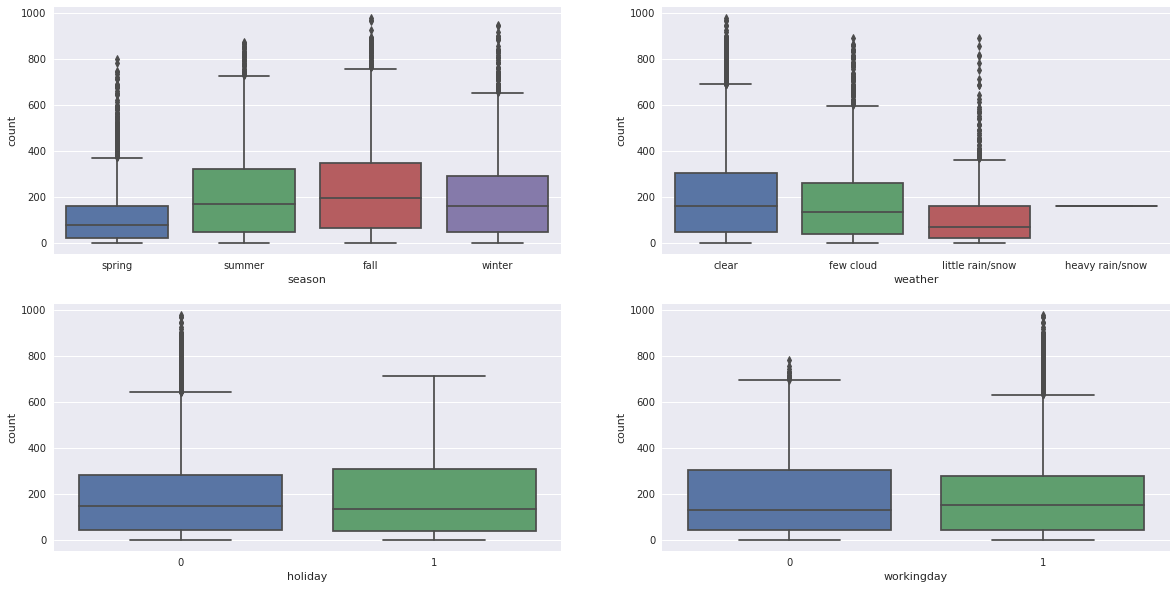

In [14]:
f, ax=plt.subplots(2, 2, figsize=(20,10))
sns.boxplot(x='season', y='count', data=train, ax=ax[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=ax[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=ax[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=ax[1,1])
plt.show();

### **count/hour with season, weather, holiday,workingday,weekday**
* Using pointplot, We easy to see many graph Effectively 

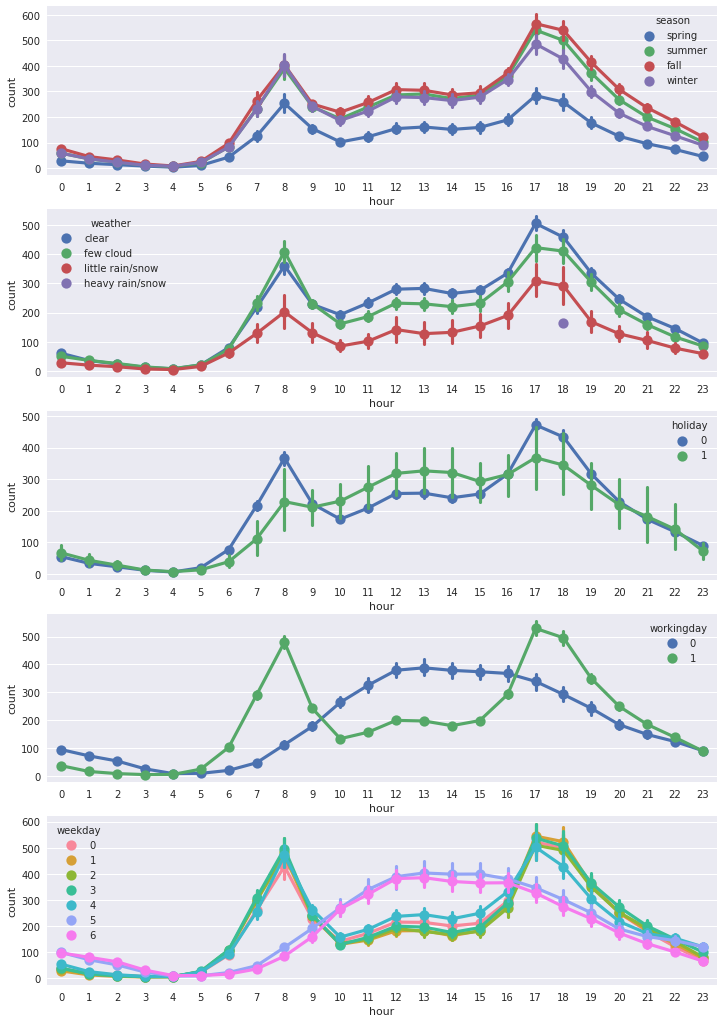

In [15]:
f, ax=plt.subplots(5, 1, figsize=(20,10))
f.set_size_inches(12, 18)
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=ax[0])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=ax[1])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=ax[2])
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=ax[3])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=ax[4])
plt.show();

* weather -> weather=4 data is outlier data 
* holiday, workingday -> 08~17h opposite data 

## **3. numerical data analyze** 

### **temp, atemp, humidity, windspeed with regplot**

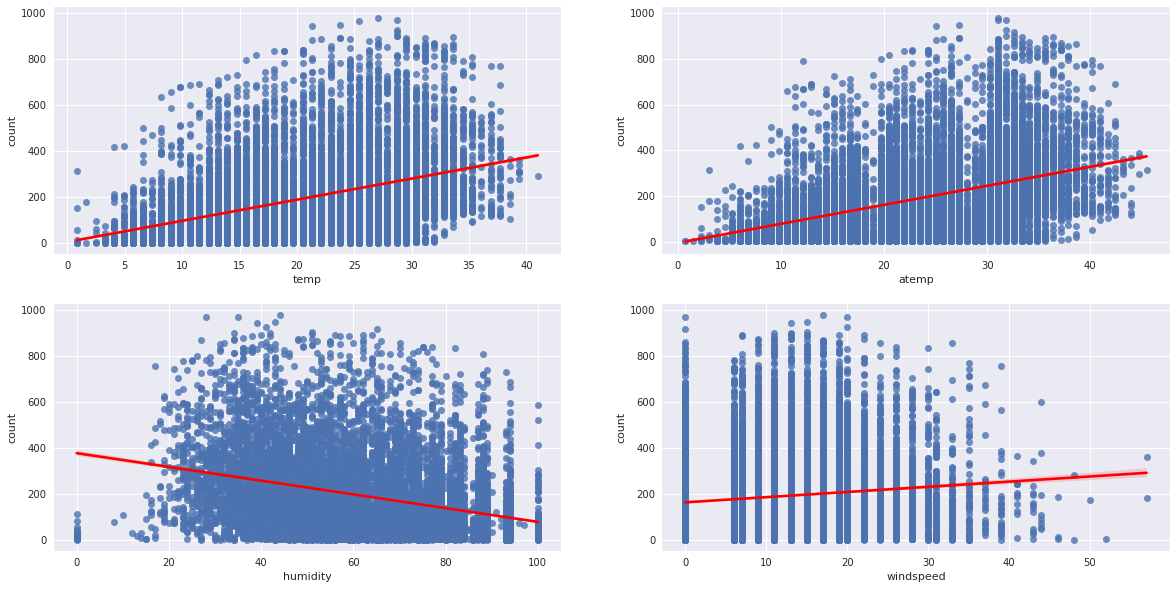

In [16]:
f,ax=plt.subplots(2, 2, figsize=(20,10))
sns.regplot(x='temp', y='count', data=train, ax=ax[0,0], line_kws={'color':'red'})
sns.regplot(x='atemp', y='count', data=train, ax=ax[0,1], line_kws={'color':'red'})
sns.regplot(x='humidity', y='count', data=train, ax=ax[1,0], line_kws={'color':'red'})
sns.regplot(x='windspeed', y='count', data=train, ax=ax[1,1], line_kws={'color':'red'})
plt.show();

* windspeed의 has '0' outlier data.. But Using this feature is best score :(

## **4. Correlation**

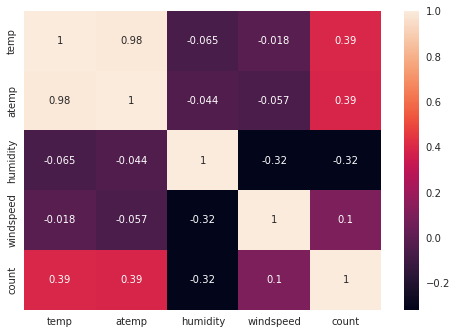

In [17]:
cmap=train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(cmap, annot=True);

* temp,atemp has 0.98 correlation but using both are good score

# **EDA Result**
### 1. count -> log(count) convert
### 2. datetime -> year,month,day,hour,minute,second 
### 3. datetime -> weekday 
### 4. casual, registered -> delete (not test feature) 
### 5. datetime, date -> delete
### 6. day -> delete 
### 7. minute, second -> delete 
### 8. weather=4 data delete
### 9. month/4=season so we delete month 

### **Select Feature : season, holiday, workingday, weather, temp, atemp, humidity, year, hour, windspeed, weekday**
           

# **Feature Engineering**

In [18]:
data_path='/kaggle/input/bike-sharing-demand/'
train=pd.read_csv(data_path +'train.csv')
test=pd.read_csv(data_path +'test.csv')

#### **weather=4 data delete** 

In [19]:
train=train[train['weather']!=4] # 이상치 제거 
data=pd.concat([train, test], ignore_index=True)
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17377,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


#### **make year, hour, weekday feature** 

In [20]:
# year, hour, weekday feature make
data['datetime']=pd.to_datetime(data['datetime'])
data['year']=data['datetime'].dt.year
data['hour']=data['datetime'].dt.hour
data['weekday']=data['datetime'].dt.weekday
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,4,5


#### **delete datetime, windspeed, casual, registered feature**

In [21]:
drop_list=['datetime','casual','registered']
data = data.drop(drop_list, axis=1)
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1.0,2011,4,5


In [22]:
X_train=data[~pd.isnull(data['count'])]
X_test=data[pd.isnull(data['count'])]
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)
y=np.log(train['count'])

In [23]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(
X_train, y, test_size=0.2, random_state=42)

# **RMSLE score**

In [25]:
def RMSLE(y_real, y_pred):
    L1 = np.log1p(np.exp(y_real))
    L2 = np.log1p(np.exp(y_pred))    
    calc = (L1 - L2) ** 2
    return np.sqrt(np.mean(calc))

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
rmsle_score=metrics.make_scorer(RMSLE, greater_is_better=False)

# **XGBoost** 

In [27]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
params={'n_estimators': [350, 400], 
        'max_depth': [4, 5, 6], 
        'learning_rate': [0.1],
        'random_state':[42]}
rmsle_score=metrics.make_scorer(RMSLE, greater_is_better=False)
grid=GridSearchCV(xgb,param_grid=params,scoring=rmsle_score, cv=5)
grid.fit(X_train, y_train)
print("Best parameters : ", grid.best_params_)

Best parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'random_state': 42}


In [28]:
xgb_best=grid.best_estimator_
y_pred1=xgb_best.predict(X_valid)
print(RMSLE(y_valid,y_pred1))

0.2945732975296287


# **HistGradientBoostingRegressor**

In [29]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgb=HistGradientBoostingRegressor()
params={'max_iter': [350, 400], 
        'max_depth': [4, 5, 6], 
        'learning_rate': [0.1],
        'random_state':[42]}
rmsle_score=metrics.make_scorer(RMSLE, greater_is_better=False)
grid=GridSearchCV(hgb,param_grid=params,scoring=rmsle_score, cv=5)
grid.fit(X_train, y_train)
print("Best parameters : ", grid.best_params_)

Best parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 350, 'random_state': 42}


In [30]:
hgb_best=grid.best_estimator_
y_pred2=hgb_best.predict(X_valid)
print(RMSLE(y_valid,y_pred2))

0.30011315322366666


# **Ensemble**

In [31]:
y_result=0.5*xgb_best.predict(X_test)+0.5*hgb_best.predict(X_test)

# **Submit**

In [32]:
submission['count']=np.exp(y_result)
submission.to_csv('submission.csv', index=False)